<a href="https://colab.research.google.com/github/ritchh12/Titanic-Survival-Analysis/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [270]:
#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix

In [271]:
df=sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [272]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [273]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


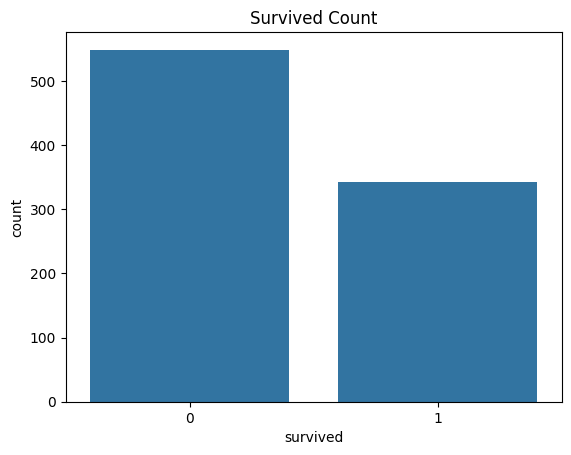

In [274]:
sns.countplot(x='survived',data=df)
plt.title('Survived Count')
plt.show()

In [275]:
# filling  missing values
# Dropping deck due to many missing value
df.drop('deck',axis=1,inplace=True)


In [276]:
#trying both for better accuracy
mean_age=df['age'].mean()
median_age=df['age'].median()

df['age'].fillna(median_age,inplace=True)


/tmp/ipython-input-276-3713607452.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age,inplace=True)


In [277]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [278]:
#Feature Engineering
#Converting categorical data to numerical data for ML model.

In [279]:
# Convert sex to numerical
df['sex']=df['sex'].map({'male':0,'female':1})

In [280]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False


In [281]:
# Dropping not useful columns
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df.drop(['who','class','adult_male','alive','alone','embark_town'],inplace=True,axis=1)

In [282]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True


In [283]:
X=df.drop('survived',axis=1)
y=df['survived']

In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [285]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=34)

In [286]:
model=LogisticRegression(max_iter=2000)

In [287]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [288]:
 #Model Evaluation

In [289]:
y_pred=model.predict(X_test)

In [290]:
print(f'accuracy_score:{accuracy_score(y_test,y_pred)*100:.2f} %')

accuracy_score:83.80 %


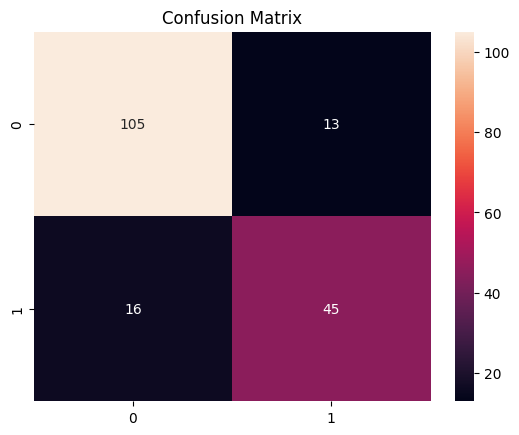

In [291]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

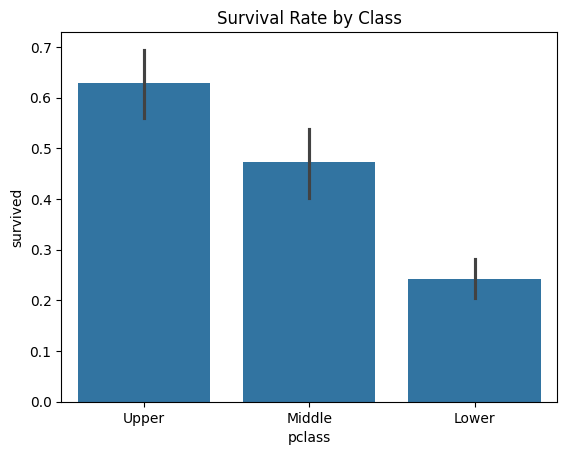

In [292]:
#SURVIVAL RATE BY CLASS
sns.barplot(x='pclass', y='survived', data=df)
plt.xticks([0,1,2],['Upper','Middle','Lower'])
plt.title('Survival Rate by Class')
plt.show()


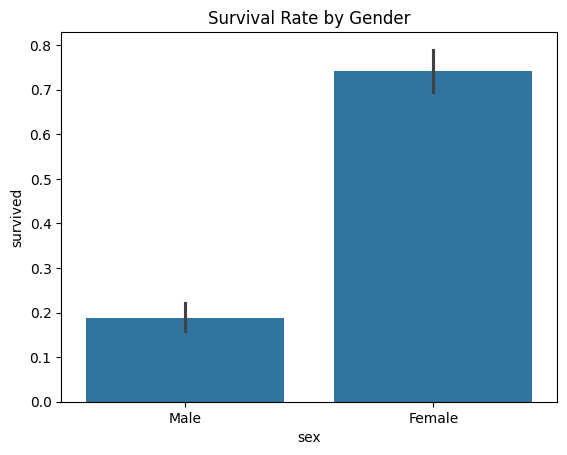

In [293]:
#SURVIVAL RATE BY GENDER
sns.barplot(x='sex', y='survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender')
plt.show()


In [294]:
#using DECISION TREE

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)*100:.2f}%')


Decision Tree Accuracy: 78.77%


In [295]:
#using RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%')


Random Forest Accuracy: 87.71%
